# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

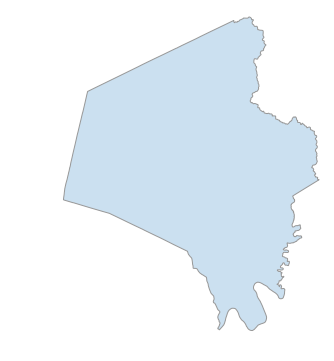

(<matplotlib.figure.Figure at 0x14246874710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x142585f4b38>)

In [1]:
import osmnx as ox
import networkx as nx
city = ox.gdf_from_place('Fayette County, KY')
ox.plot_shape(ox.project_gdf(city))

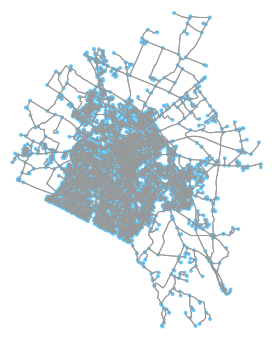

(<matplotlib.figure.Figure at 0x1425ec4b048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1425ec528d0>)

In [2]:
G = ox.graph_from_place('Fayette county, Kentucky', network_type='drive')
ox.plot_graph(G)

In [3]:
stats = ox.basic_stats(ox.graph_from_place('Fayette county, Kentucky, USA'))
stats

{'circuity_avg': 1.094014969806577,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 94.79384141949849,
 'edge_length_total': 6685999.223000067,
 'intersection_count': 21196,
 'intersection_density_km': None,
 'k_avg': 5.528019437259974,
 'm': 70532,
 'n': 25518,
 'node_density_km': None,
 'self_loop_proportion': 0.006351726875744343,
 'street_density_km': None,
 'street_length_avg': 97.80407879304857,
 'street_length_total': 3669217.8200000105,
 'street_segments_count': 37516,
 'streets_per_node_avg': 2.926365702641273,
 'streets_per_node_counts': {0: 0,
  1: 4322,
  2: 48,
  3: 14462,
  4: 6570,
  5: 107,
  6: 7,
  7: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.16937064033231444,
  2: 0.0018810251587114979,
  3: 0.5667372051101184,
  4: 0.25746531859863625,
  5: 0.0041931185829610475,
  6: 0.0002743161689787601,
  7: 7.837604827964574e-05}}

In [4]:
# get the street network for a place, and its area in square meters
place = 'Fayette county, Kentucky, USA'
gdf = ox.gdf_from_place(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type='drive_service')

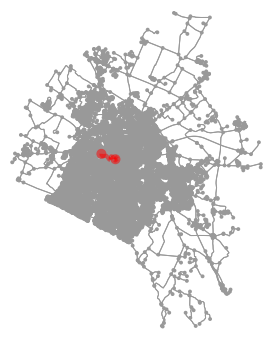

(<matplotlib.figure.Figure at 0x1425ebb33c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1426541d4e0>)

In [9]:
#home
origin = ox.get_nearest_node(G, (38.04376,-84.52380))
#UK
destination = ox.get_nearest_node(G, (38.03730,-84.50504))

route = nx.shortest_path(G, origin, destination)
ox.plot_graph_route(G, route)

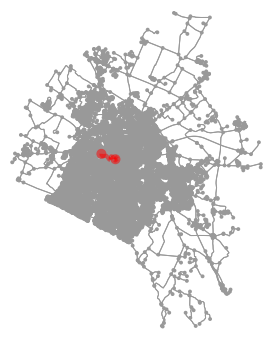

(<matplotlib.figure.Figure at 0x14266c66940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14266c66240>)

In [10]:
#route home - UK
route1 = nx.shortest_path(G, origin, destination1)
ox.plot_graph_route(G, route1)

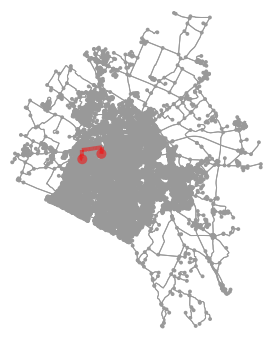

(<matplotlib.figure.Figure at 0x1425f3c70f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1425f3c1a58>)

In [11]:
#route home-kroger
destination2 = ox.get_nearest_node(G, (38.03756,-84.55009))
route2 = nx.shortest_path(G, origin, destination2)
ox.plot_graph_route(G, route2)

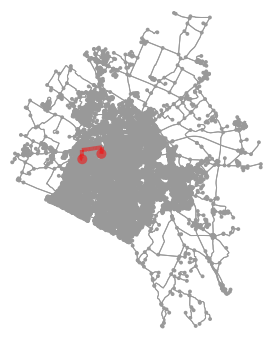

(<matplotlib.figure.Figure at 0x1426568d358>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1426568d518>)

In [12]:
#route home-petsmart
destination3 = ox.get_nearest_node(G, (38.02217,-84.41800))
route3 = nx.shortest_path(G, origin, destination2)
ox.plot_graph_route(G, route3)

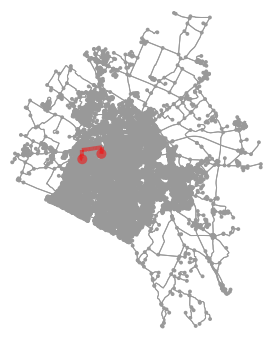

(<matplotlib.figure.Figure at 0x14264ca3940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14264c83e48>)

In [13]:
#route home-walmart
destination4 = ox.get_nearest_node(G, (38.03769,-84.42163))
route4 = nx.shortest_path(G, origin, destination2)
ox.plot_graph_route(G, route4)